# Classification of emotions

## Importing the libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

## Loading the images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Datasets/fer2013_2_classes.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

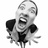

In [ ]:
tf.keras.preprocessing.image.load_img('/content/fer2013_2_classes/train/Angry/1003.jpg')

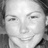

In [ ]:
image = tf.keras.preprocessing.image.load_img('/content/fer2013_2_classes/train/Happy/1.jpg')
image

### Train and test set

In [ ]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('/content/fer2013_2_classes/train',
                                                        target_size = (48, 48),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 11210 images belonging to 2 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
np.unique(train_dataset.classes, return_counts=True)

(array([0, 1], dtype=int32), array([3995, 7215]))

In [ ]:
train_dataset.class_indices

{'Angry': 0, 'Happy': 1}

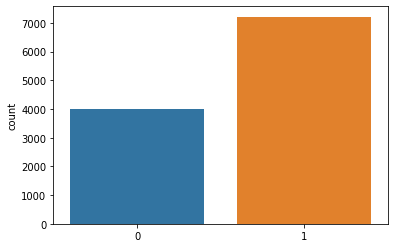

In [ ]:
sns.countplot(x = train_dataset.classes);

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/fer2013_2_classes/validation',
                                                  target_size = (48, 48),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 1370 images belonging to 2 classes.


## Building and training the convolutional neural network

In [ ]:
num_detectors = 32
num_classes = 2
width, height = 48, 48
epochs = 50

network = Sequential()

network.add(Conv2D(num_detectors, (3, 3), activation = 'relu', padding = 'same', input_shape = (width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors, (3, 3), activation = 'relu', padding = "same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Flatten())
network.add(Dense(2*num_detectors, activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2*num_detectors, activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation='softmax'))

print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [ ]:
network.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
network.fit(train_dataset, epochs=epochs)

Epoch 1/50
701/701 [==============================] - 23s 21ms/step - loss: 0.7863 - accuracy: 0.5846
Epoch 2/50
701/701 [==============================] - 14s 21ms/step - loss: 0.5909 - accuracy: 0.6888
Epoch 3/50
701/701 [==============================] - 15s 21ms/step - loss: 0.4463 - accuracy: 0.7942
Epoch 4/50
701/701 [==============================] - 15s 21ms/step - loss: 0.3793 - accuracy: 0.8306
Epoch 5/50
701/701 [==============================] - 14s 20ms/step - loss: 0.3557 - accuracy: 0.8477
Epoch 6/50
701/701 [==============================] - 14s 20ms/step - loss: 0.3435 - accuracy: 0.8515
Epoch 7/50
701/701 [==============================] - 14s 20ms/step - loss: 0.3209 - accuracy: 0.8606
Epoch 8/50
701/701 [==============================] - 15s 21ms/step - loss: 0.3083 - accuracy: 0.8733
Epoch 9/50
701/701 [==============================] - 15s 21ms/step - loss: 0.2978 - accuracy: 0.8745
Epoch 10/50
701/701 [==============================] - 15s 22ms/step - loss: 0.284

## Evaluating the neural network

In [ ]:
network.evaluate(test_dataset)

1370/1370 [==============================] - 5s 3ms/step - loss: 0.2098 - accuracy: 0.9117


[0.20976221561431885, 0.9116788506507874]

In [ ]:
predictions = network.predict(test_dataset)
predictions

array([[9.9562413e-01, 4.3759295e-03],
       [9.9810541e-01, 1.8946185e-03],
       [9.9721789e-01, 2.7821457e-03],
       ...,
       [4.8028938e-05, 9.9995196e-01],
       [5.7855318e-06, 9.9999416e-01],
       [7.6678174e-05, 9.9992335e-01]], dtype=float32)

In [ ]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
test_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.9116788321167884

In [ ]:
test_dataset.class_indices

{'Angry': 0, 'Happy': 1}

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[446,  45],
       [ 76, 803]])

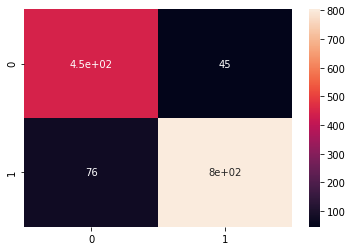

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       491
           1       0.95      0.91      0.93       879

    accuracy                           0.91      1370
   macro avg       0.90      0.91      0.91      1370
weighted avg       0.91      0.91      0.91      1370

